In [93]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from datetime import datetime, date, time, timedelta
import matplotlib.cm as cm
import matplotlib.dates as mdates
import copy

In [48]:
#GetData
df = pd.read_csv('../../di/temp_datalab_records_social_facebook.csv')
print(df.shape)
print(df.columns)

(3621391, 14)
Index(['dataset_id', 'time', 'username', 'checkins', 'has_added_app',
       'were_here_count', 'likes', 'talking_about_count', 'facebook_id',
       'date_added', 'date_updated', 'entity_id', 'cusip', 'isin'],
      dtype='object')


In [49]:
df.head()

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN


In [75]:
#Fix time and make a separeate date colums, for plotting
df["time2"] = pd.to_datetime(df['time'])
print(df['time2'].min(),df['time2'].max())
df['date'] = df['time2'].dt.date

2015-01-01 05:00:00+00:00 2018-07-17 04:00:00+00:00


In [53]:
#clean the Nan for the column we are interested in
df.isna().any()
df = df.dropna(subset=['talking_about_count','username'])

In [54]:
entries_per_name = df['username'].value_counts()
print(entries_per_name[:10])
print(len(entries_per_name))

TiVo                 1222
RedRobin             1222
ModelNInc            1222
shutterfly           1222
aflacduck            1222
2u                   1222
SPG                  1222
Cerner               1221
GrandCanyonU         1221
lumberliquidators    1221
Name: username, dtype: int64
4950


In [ ]:
#Create several "Volatility" type variables for each name
volat_vars = []
for name in entries_per_name.keys():
    tac = df[df['username'] == name]['talking_about_count']
    
    span = (tac.max()-tac.min())
    spike = (tac.max()-tac.mean())
    drop = (tac.mean()-tac.min())
    std = tac.std()
    
    book = {}
    book['username'] = name
    book['span'] = span
    book['spike'] = spike
    book['drop'] = drop
    book['volatility']  = np.sqrt(std)
    volat_vars.append(book)

In [58]:
df_vol = pd.DataFrame(volat_vars)

In [59]:
df_vol.sort_values(by=['span'], ascending=False)[:10]

,username,span,spike,drop,volatility
389,wwe,5661781,4.403702e+06,1.258079e+06,713.998737
2645,CBSNews,4995264,3.947075e+06,1.048189e+06,923.458070
2692,NYPost,4864268,4.369441e+06,4.948266e+05,721.438846
854,yahoo,4817360,4.191641e+06,6.257188e+05,806.461265
165,manchesterunited,4300475,2.659042e+06,1.641433e+06,831.052310
619,dickssportinggoods,4212141,4.146875e+06,6.526587e+04,560.826952
1472,nytimes,4182808,3.010152e+06,1.172656e+06,696.642560
2166,Fox8NewsCleveland,4080745,3.838032e+06,2.427129e+05,576.199545
1268,usatoday,3607883,2.793625e+06,8.142578e+05,734.082032
884,CollegeHumor,3545506,2.764963e+06,7.805431e+05,682.830299


In [60]:
df_vol.sort_values(by=['spike'], ascending=False)[:10]

,username,span,spike,drop,volatility
389,wwe,5661781,4.403702e+06,1.258079e+06,713.998737
2692,NYPost,4864268,4.369441e+06,4.948266e+05,721.438846
854,yahoo,4817360,4.191641e+06,6.257188e+05,806.461265
619,dickssportinggoods,4212141,4.146875e+06,6.526587e+04,560.826952
2645,CBSNews,4995264,3.947075e+06,1.048189e+06,923.458070
2166,Fox8NewsCleveland,4080745,3.838032e+06,2.427129e+05,576.199545
2095,MomsBestFanPage,3200304,3.147805e+06,5.249936e+04,537.925691
1472,nytimes,4182808,3.010152e+06,1.172656e+06,696.642560
957,kohls,2996610,2.906212e+06,9.039846e+04,494.257982
1650,ToyotaSpecialShowroom,3040407,2.903701e+06,1.367057e+05,670.459378


In [61]:
df_vol.sort_values(by=['drop'], ascending=False)[:10]

,username,span,spike,drop,volatility
165,manchesterunited,4300475,2.659042e+06,1.641433e+06,831.052310
389,wwe,5661781,4.403702e+06,1.258079e+06,713.998737
1472,nytimes,4182808,3.010152e+06,1.172656e+06,696.642560
2645,CBSNews,4995264,3.947075e+06,1.048189e+06,923.458070
1268,usatoday,3607883,2.793625e+06,8.142578e+05,734.082032
884,CollegeHumor,3545506,2.764963e+06,7.805431e+05,682.830299
2712,Storyful,3287107,2.534297e+06,7.528102e+05,821.439221
829,ESPN,2183411,1.446005e+06,7.374060e+05,529.456535
854,yahoo,4817360,4.191641e+06,6.257188e+05,806.461265
2692,NYPost,4864268,4.369441e+06,4.948266e+05,721.438846


In [62]:
df_vol.sort_values(by=['volatility'], ascending=False)[:10]

,username,span,spike,drop,volatility
2645,CBSNews,4995264,3.947075e+06,1.048189e+06,923.458070
165,manchesterunited,4300475,2.659042e+06,1.641433e+06,831.052310
2712,Storyful,3287107,2.534297e+06,7.528102e+05,821.439221
854,yahoo,4817360,4.191641e+06,6.257188e+05,806.461265
1268,usatoday,3607883,2.793625e+06,8.142578e+05,734.082032
2692,NYPost,4864268,4.369441e+06,4.948266e+05,721.438846
389,wwe,5661781,4.403702e+06,1.258079e+06,713.998737
1472,nytimes,4182808,3.010152e+06,1.172656e+06,696.642560
884,CollegeHumor,3545506,2.764963e+06,7.805431e+05,682.830299
1650,ToyotaSpecialShowroom,3040407,2.903701e+06,1.367057e+05,670.459378


In [63]:
#Get top ten companies for each volatility variable
vol_names = df_vol.sort_values(by=['volatility'], ascending=False)['username'][:10]
span_names = df_vol.sort_values(by=['span'], ascending=False)['username'][:10]
spike_names = df_vol.sort_values(by=['spike'], ascending=False)['username'][:10]
drop_names = df_vol.sort_values(by=['drop'], ascending=False)['username'][:10]

In [65]:
print(span_names[:10])

389                    wwe
2645               CBSNews
2692                NYPost
854                  yahoo
165       manchesterunited
619     dickssportinggoods
1472               nytimes
2166     Fox8NewsCleveland
1268              usatoday
884           CollegeHumor
Name: username, dtype: object


In [66]:
df_span = df[df["username"].isin(span_names)][['username','date','talking_about_count','likes']] 
df_spike = df[df["username"].isin(spike_names)][['username','date','talking_about_count','likes']] 
df_drop = df[df["username"].isin(drop_names)][['username','date','talking_about_count','likes']] 
df_volat = df[df["username"].isin(vol_names)][['username','date','talking_about_count','likes']] 

In [67]:
df_tspan =df_span.pivot(index ='date', columns = 'username', values = ['talking_about_count'])
df_tspike =df_spike.pivot(index ='date', columns = 'username', values = ['talking_about_count'])
df_tdrop =df_drop.pivot(index ='date', columns = 'username', values = ['talking_about_count'])
df_tvolat =df_volat.pivot(index ='date', columns = 'username', values = ['talking_about_count'])

In [68]:
df_lspan =df_span.pivot(index ='date', columns = 'username', values = ['likes'])
df_lspike =df_spike.pivot(index ='date', columns = 'username', values = ['likes'])
df_ldrop =df_drop.pivot(index ='date', columns = 'username', values = ['likes'])
df_lvolat =df_volat.pivot(index ='date', columns = 'username', values = ['likes'])

In [103]:
df_tspan=(df_tspan-df_tspan.min())/(df_tspan.max()-df_tspan.min())
df_lspan=(df_lspan-df_lspan.min())/(df_lspan.max()-df_lspan.min())
df_tspike=(df_tspike-df_tspike.min())/(df_tspike.max()-df_tspike.min())
df_lspike=(df_lspike-df_lspike.min())/(df_lspike.max()-df_lspike.min())
df_tdrop=(df_tdrop-df_tdrop.min())/(df_tdrop.max()-df_tdrop.min())
df_ldrop=(df_ldrop-df_ldrop.min())/(df_ldrop.max()-df_ldrop.min())
df_tvolat=(df_tvolat-df_tvolat.min())/(df_tvolat.max()-df_tvolat.min())
df_lvolat=(df_lvolat-df_lvolat.min())/(df_lvolat.max()-df_lvolat.min())

In [104]:
start = pd.to_datetime("01/10/2015")
end = pd.to_datetime("07/17/2018")
def Plot_TAC(df_span,start,end,name):
    colors = ["black", "darkred", "darkorange", 'goldenrod',"forestgreen", "darkslategrey","darkblue","indigo","purple",'deeppink']

    fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(20, 10),sharex =True)
    fig.suptitle(name, fontsize="x-large",y=1.05)
    fig.tight_layout() 
    for i,var in enumerate(df_span.columns):
        axes[i].tick_params(axis='x',which='both', bottom=False)
        axes[i].tick_params(axis='y',which='both', left=False)
        axes[i].set_yticks([])
        axes[i].set_xticks([])
        df_span[var].plot(ax=axes[i],grid =True, label=var[1].upper(), c = colors[i],xlim=(start,end))
        axes[i].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
        axes[i].set_xlabel('DATE',fontsize="x-large")
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['left'].set_visible(False)
        axes[i].spines['top'].set_visible(False)
        axes[i].legend(loc='upper left')

In [105]:
name_tspan = "Facebook Talking About Count (companies with the biggest range)".upper()
name_tspike = "Facebook Talking About Count (companies with the biggest spike)".upper()
name_tdrop = "Facebook Talking About Count (companies with the biggest drop)".upper()
name_tvolat = "Facebook Talking About Count (companies with the biggest volatility)".upper()

name_lspan = "Facebook Talking About Count and Likes (companies with the biggest range)".upper()
name_lspike = "Facebook Talking About Count and Likes (companies with the biggest spike)".upper()
name_ldrop = "Facebook Talking About Count and Likes (companies with the biggest drop)".upper()
name_lvolat = "Facebook Talking About Count and Likes (companies with the biggest volatility)".upper()


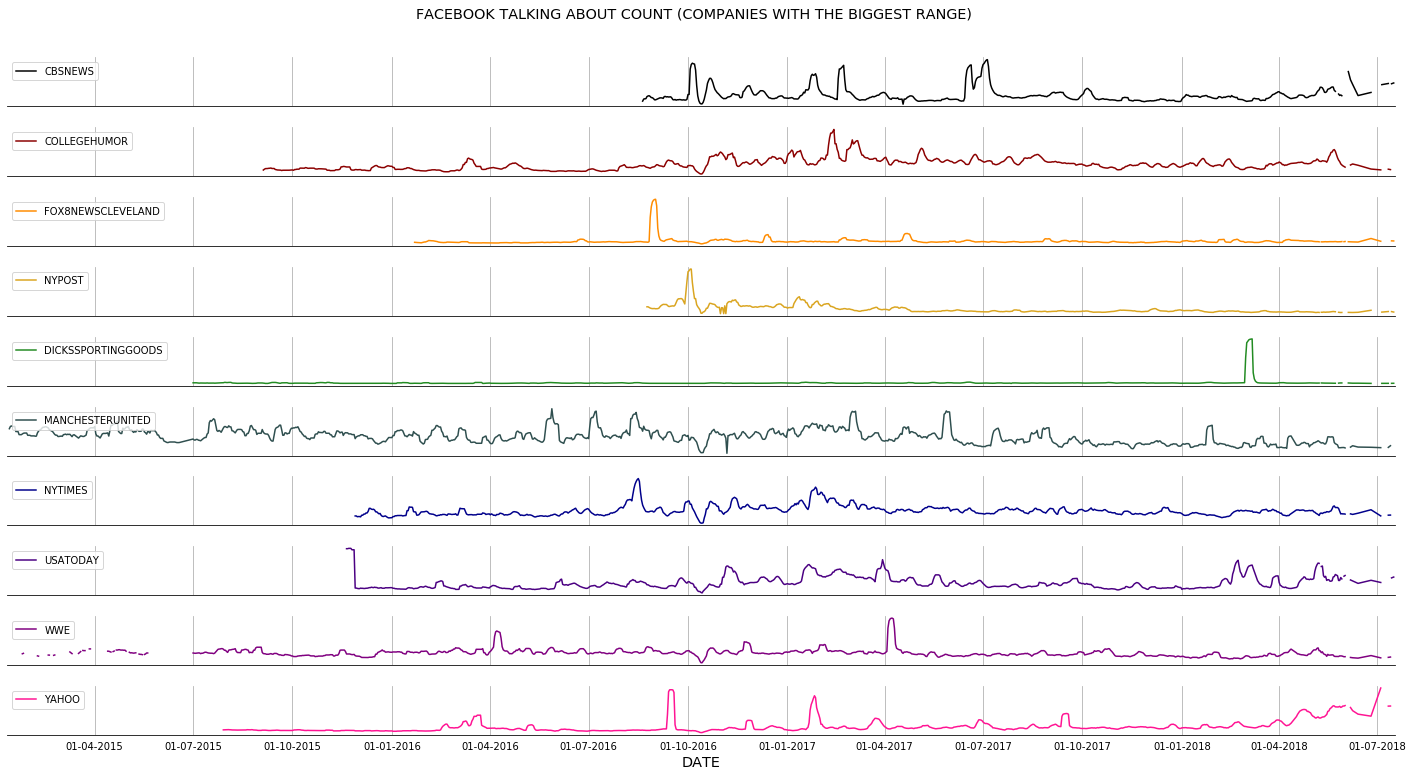

In [106]:
Plot_TAC(df_tspan,start,end,name_tspan)

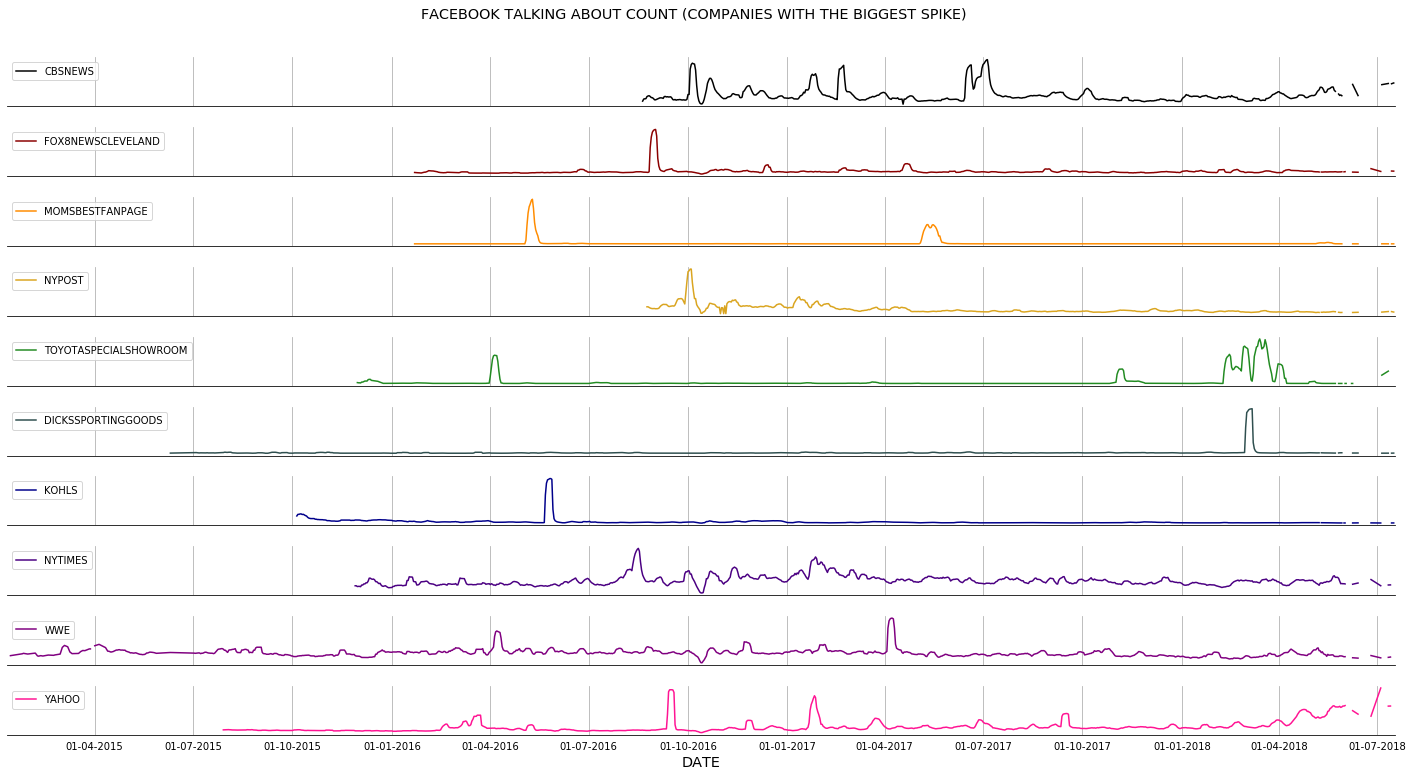

In [107]:
Plot_TAC(df_tspike,start,end,name_tspike)

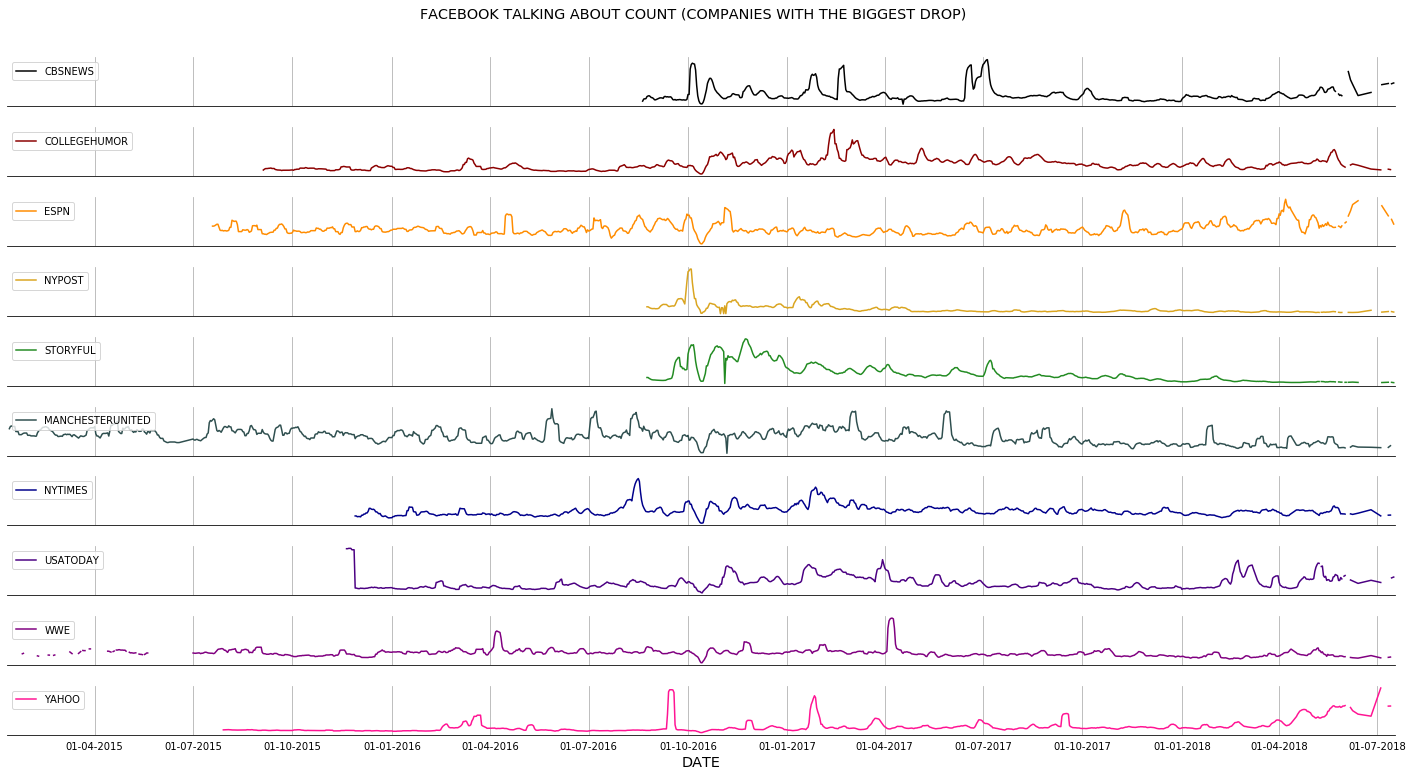

In [108]:
Plot_TAC(df_tdrop,start,end,name_tdrop)

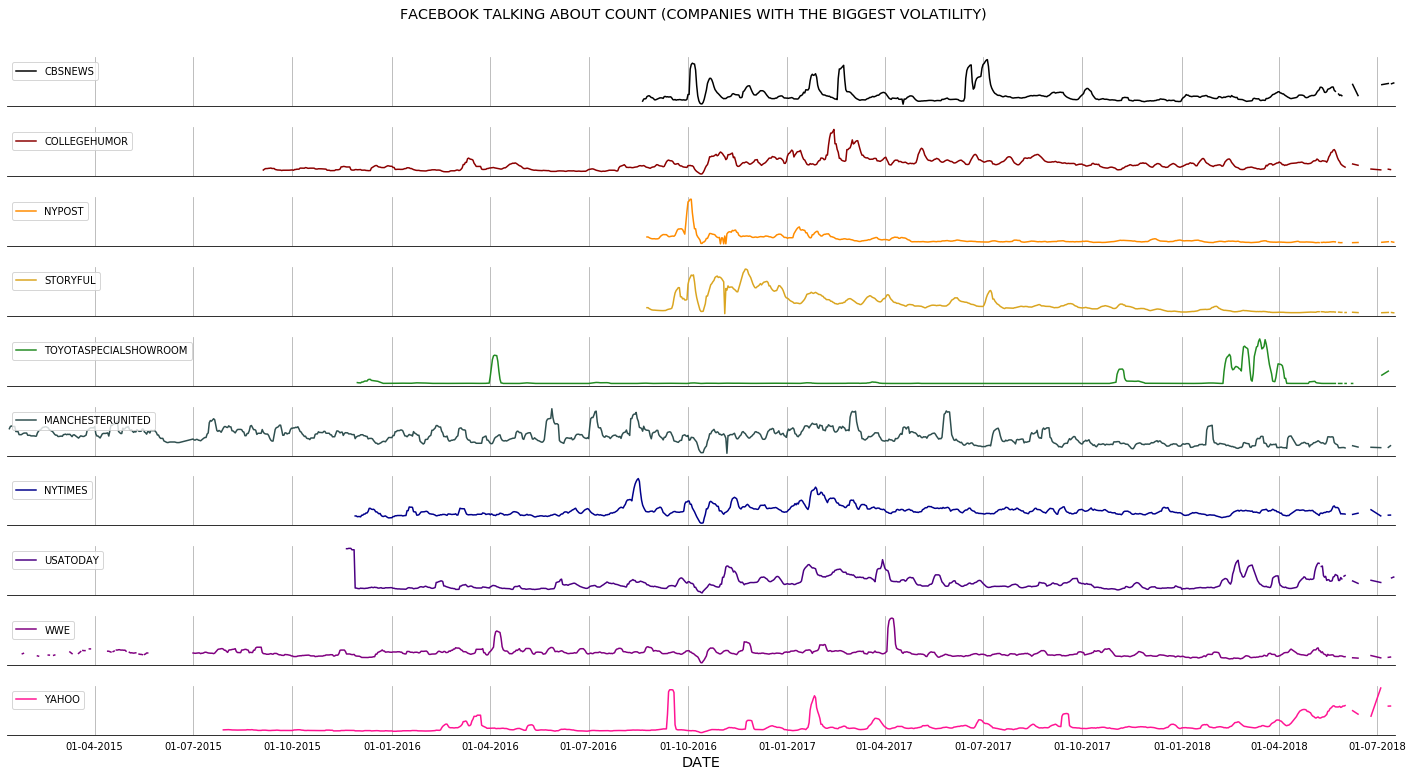

In [109]:
Plot_TAC(df_tvolat,start,end,name_tvolat)

In [115]:
start = pd.to_datetime("01/10/2015")
end = pd.to_datetime("07/17/2018")
def Plot_TAC_LIKE(df_span,df_like,start,end,name):
    colors = ["black", "darkred", "darkorange", 'goldenrod',"forestgreen", "darkslategrey","darkblue","indigo","purple",'deeppink']

    fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(20, 10),sharex =True)
    fig.suptitle(name, fontsize="x-large",y=1.05)
    fig.tight_layout() 
    for i,var in enumerate(df_span.columns):
        lcol = list(var)
        lcol[0] = 'likes'
        axes[i].tick_params(axis='x',which='both', bottom=False)
        axes[i].tick_params(axis='y',which='both', left=False)
        axes[i].set_yticks([])
        axes[i].set_xticks([])
        df_span[var].plot(ax=axes[i],grid =True, label=var[1].upper()+" "+var[0].upper(), c = colors[i],xlim=(start,end))
        df_like[tuple(lcol)].plot(ax=axes[i],grid =True, label=lcol[1].upper()+" "+lcol[0].upper(), c = colors[i],xlim=(start,end),ls = '--')
        axes[i].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
        axes[i].set_xlabel('DATE',fontsize="x-large")
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['left'].set_visible(False)
        axes[i].spines['top'].set_visible(False)
        axes[i].legend(loc='upper left')

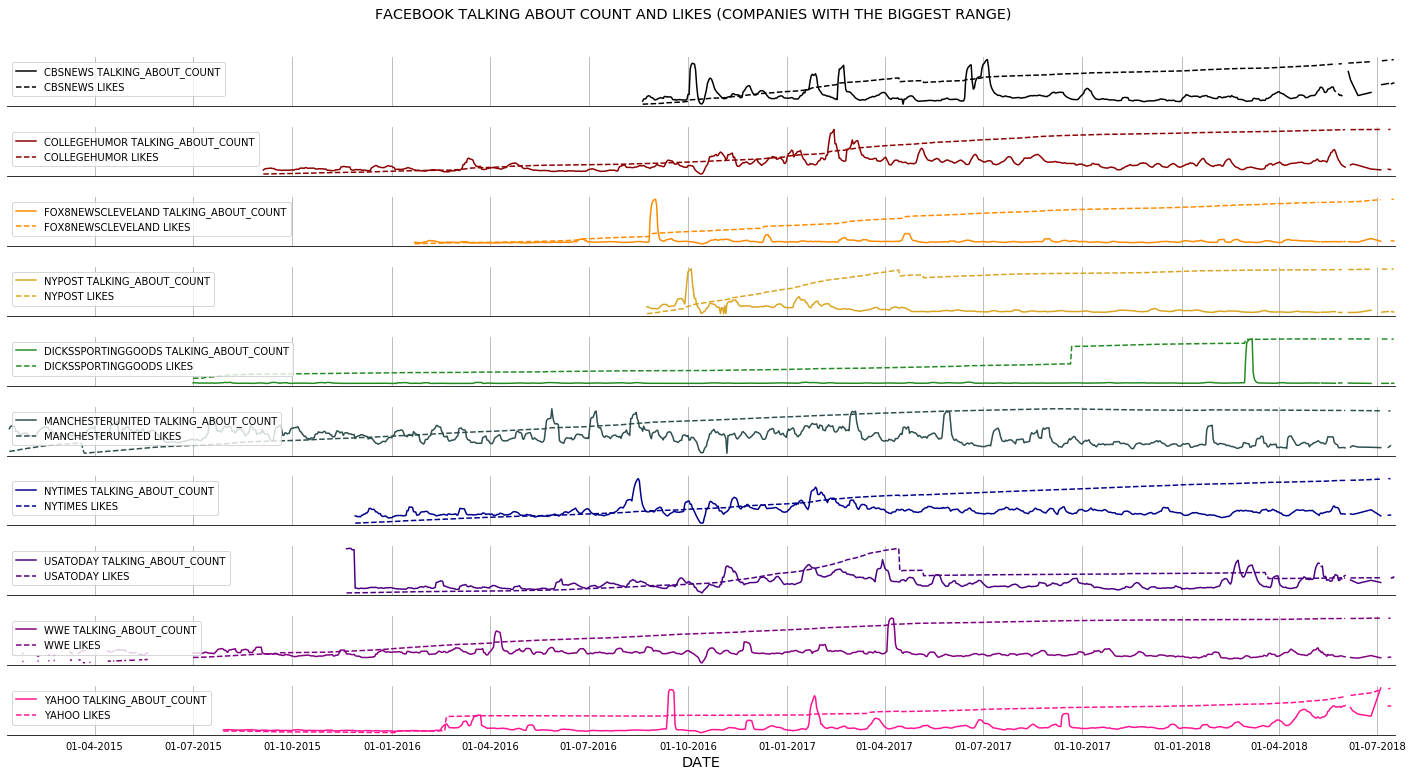

In [116]:
Plot_TAC_LIKE(df_tspan,df_lspan,start,end,name_lspan)

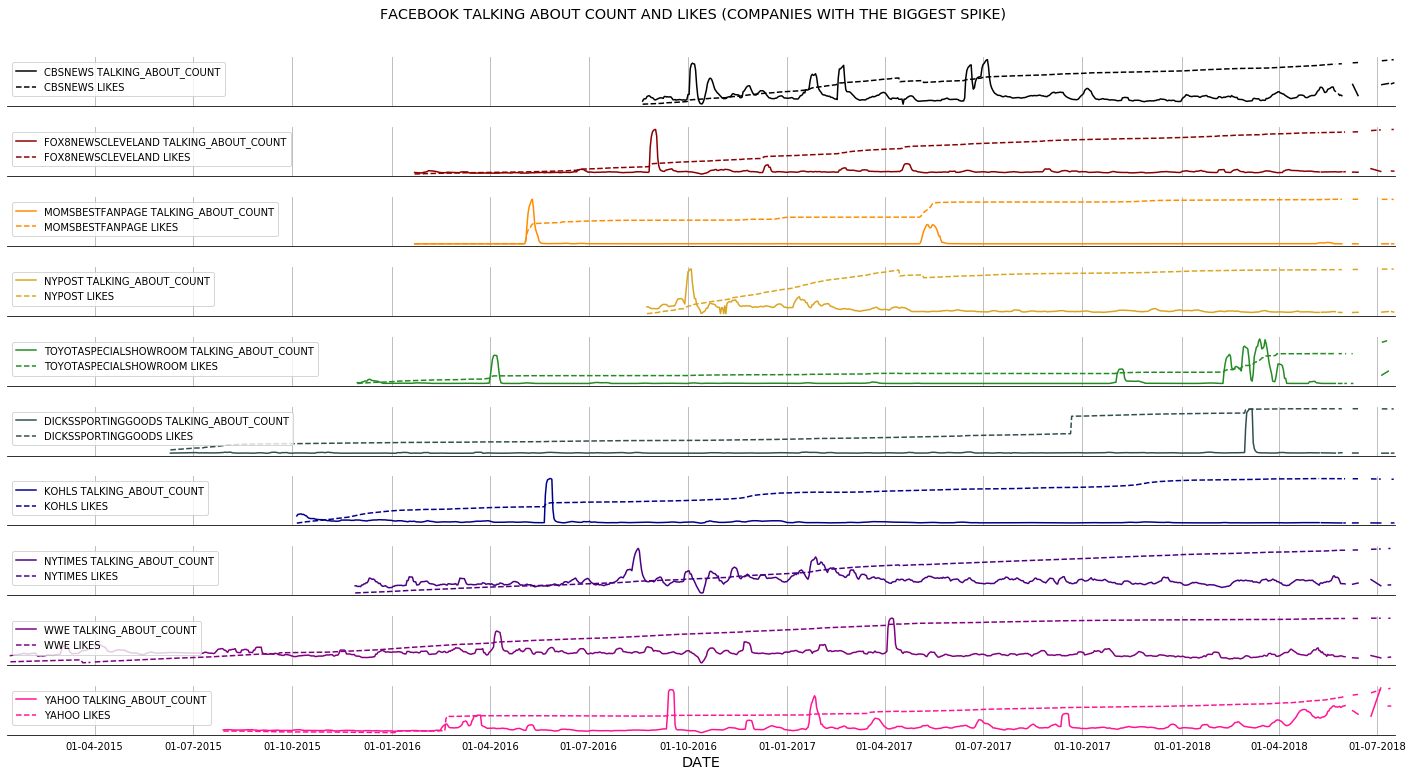

In [117]:
Plot_TAC_LIKE(df_tspike,df_lspike,start,end,name_lspike)

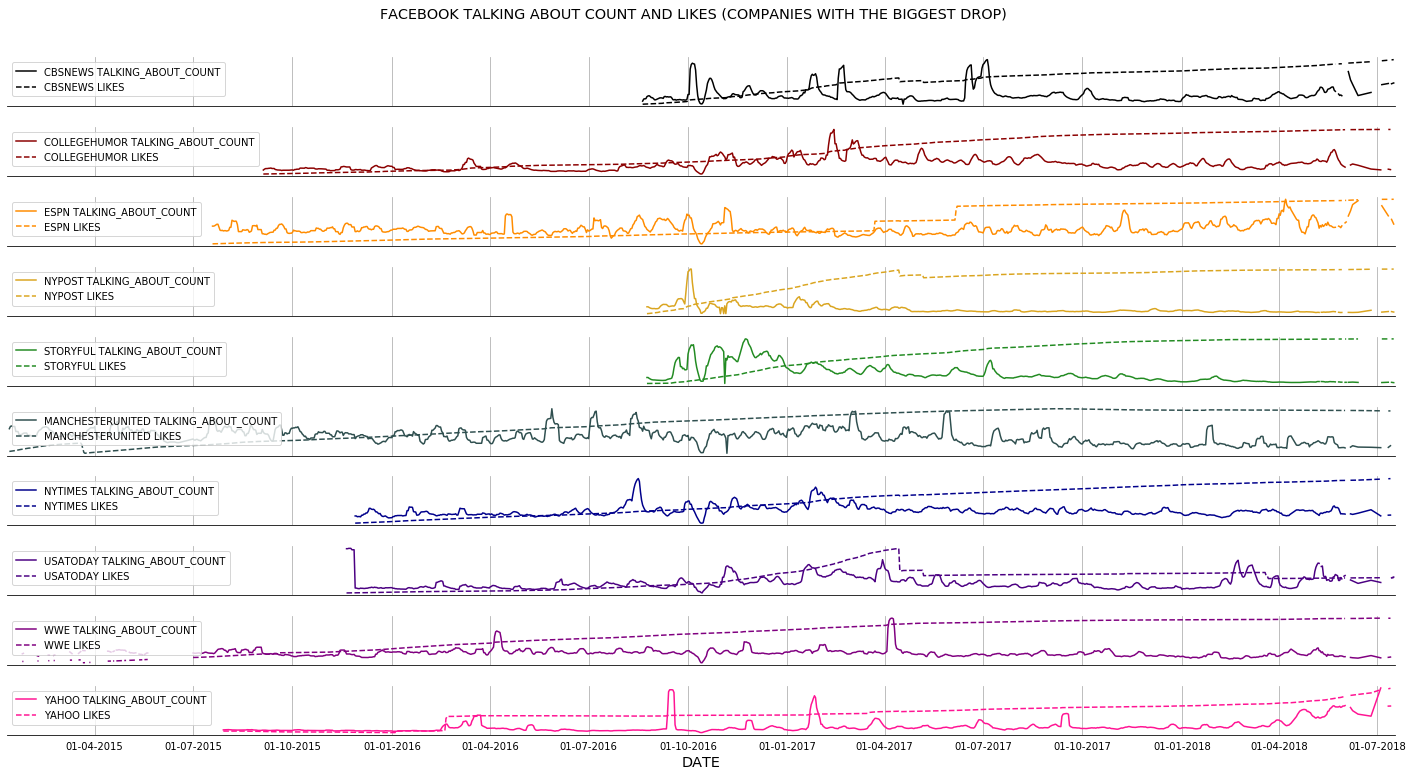

In [118]:
Plot_TAC_LIKE(df_tdrop,df_ldrop,start,end,name_ldrop)

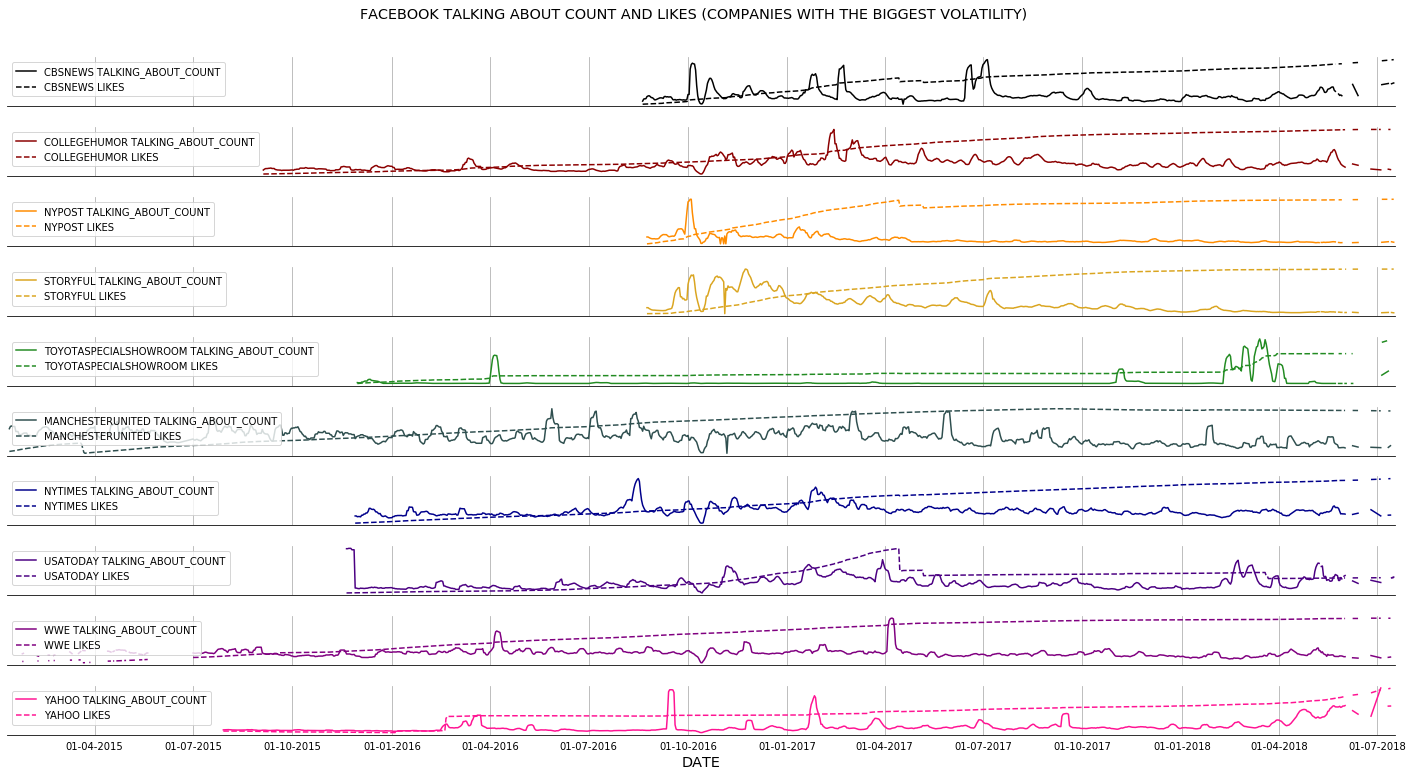

In [119]:
Plot_TAC_LIKE(df_tvolat,df_lvolat,start,end,name_lvolat)